In [1]:
import camb
from camb import model, initialpower
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import math

np.set_printoptions(16)

import warnings
warnings.filterwarnings("ignore")

Nside=512
#sky = pysm3.Sky(nside=Nside, preset_strings=["d1", "s1"])  #128 Inside is not adequate for 30' resolution
#sky=hp.ud_grade(hp.read_map('galactic_emission_140GHz.fits',(0,1,2)),Nside)

#cmb = pysm3.Sky(nside=Nside, preset_strings=["c1"])  

#map_100GHzRJ = pysm3.Sky(nside=Nside, preset_strings=["d1", "s1"]).get_emission(100 * u.GHz)
#map_140GHz = sky

#map_100GHz = map_100GHzRJ.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(100*u.GHz)) #convert

# Generate r=0 map from CAMB and use Q U spinor to roatate 
### (Locally, means the polarization plane is rotated)

In [2]:
# GENERATE cls from camb
cp=camb.read_ini('planck_2018_acc_np_params.ini')   #patricia's data
powers=camb.get_results(cp).get_cmb_power_spectra(cp,CMB_unit='muK')  #set unit micro K
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']

ls = np.transpose(np.arange(totCL.shape[0]))
ls=ls+1
for i in [0,1,2,3]:
    totCL[:,i]=totCL[:,i]/ls/(ls+1)*2*np.pi    # camb data is with l(l+1)/2pi
    unlensedCL[:,i]=unlensedCL[:,i]/ls/(ls+1)*2*np.pi
#camb gives l(l+1)cl/2/pi

In [3]:
np.transpose(unlensedCL)

array([[0.0000000000000000e+00, 0.0000000000000000e+00,
        5.3205583836189999e+02, ..., 5.5059455283577267e-11,
        5.5028149113659987e-11, 5.4996840846998880e-11],
       [0.0000000000000000e+00, 0.0000000000000000e+00,
        1.6168881532016829e-02, ..., 1.0040365988966380e-14,
        9.9994890075346603e-15, 9.9595567348388494e-15],
       [0.0000000000000000e+00, 0.0000000000000000e+00,
        0.0000000000000000e+00, ..., 0.0000000000000000e+00,
        0.0000000000000000e+00, 0.0000000000000000e+00],
       [0.0000000000000000e+00, 0.0000000000000000e+00,
        1.3723835741827717e+00, ..., 3.4972028744391551e-13,
        3.4957509019411943e-13, 3.4942651963902949e-13]])

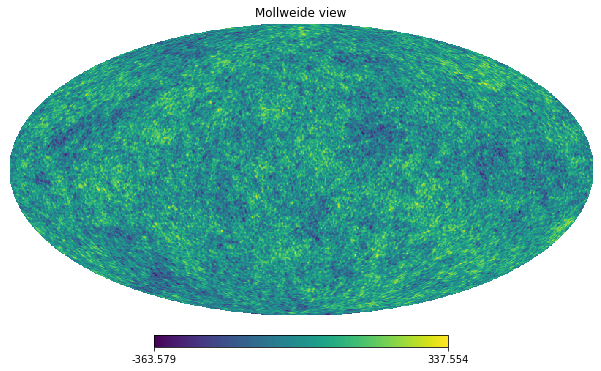

In [4]:
hp.mollview(hp.synfast(np.transpose(unlensedCL),512,fwhm=30*np.pi/180/60)[0])   #Windowfunction for better looking and realistic (filtered high multipoles)

In [5]:
#LiteBIRD
totTQU=hp.synfast(np.transpose(totCL),512,new=True,fwhm=30*np.pi/180/60)   #  TT EE BB TE TB EB     'new' parameter
unlensedTQU=hp.synfast(np.transpose(unlensedCL),512,new=True,fwhm=30*np.pi/180/60)

#1.4' DW and LAT
totTQU_DW=hp.synfast(np.transpose(totCL),512,new=True,fwhm=1.4*np.pi/180/60)   #  TT EE BB TE TB EB     'new' parameter
unlensedTQU_DW=hp.synfast(np.transpose(unlensedCL),512,new=True,fwhm=1.4*np.pi/180/60)

#1.5'
totTQU_UD=hp.synfast(np.transpose(totCL),512,new=True,fwhm=1.5*np.pi/180/60)   #  TT EE BB TE TB EB     'new' parameter
unlensedTQU_UD=hp.synfast(np.transpose(unlensedCL),512,new=True,fwhm=1.5*np.pi/180/60)


#6.2'
totTQU_PICO=hp.synfast(np.transpose(totCL),512,new=True,fwhm=6.2*np.pi/180/60)   #  TT EE BB TE TB EB     'new' parameter
unlensedTQU_PICO=hp.synfast(np.transpose(unlensedCL),512,new=True,fwhm=6.2*np.pi/180/60)

#17'
totTQU_SAT=hp.synfast(np.transpose(totCL),512,new=True,fwhm=17*np.pi/180/60)   #  TT EE BB TE TB EB     'new' parameter
unlensedTQU_SAT=hp.synfast(np.transpose(unlensedCL),512,new=True,fwhm=17*np.pi/180/60)

In [6]:
#rotate 
import math

#LiteBIRD
unlensedTQU_TEB=hp.anafast(unlensedTQU)
totTQU_TEB=hp.anafast(totTQU)

alpha=np.array([1,3,5,7,10,12,14,16,18,20,22,24,26,28,30,60,90])/60*np.pi/180   

unlensedTQU_alpha=np.zeros((len(alpha), 3, len(unlensedTQU[0])))  
unlensedTQU_alpha_TEB=np.zeros((len(alpha), 6, len(unlensedTQU_TEB[0])))
for i in np.arange(len(alpha)):
    unlensedTQU_alpha[i][0]=unlensedTQU[0]
    unlensedTQU_alpha[i][1]=unlensedTQU[1]*math.cos(2*alpha[i])+unlensedTQU[2]*math.sin(2*alpha[i])
    unlensedTQU_alpha[i][2]=-unlensedTQU[1]*math.sin(2*alpha[i])+unlensedTQU[2]*math.cos(2*alpha[i])

    unlensedTQU_alpha_TEB[i]=hp.anafast(unlensedTQU_alpha[i])


In [7]:

#DW
unlensedTQU_DW_TEB=hp.anafast(unlensedTQU_DW)
totTQU_DW_TEB=hp.anafast(totTQU_DW)

unlensedTQU_DW_alpha=np.zeros((len(alpha), 3, len(unlensedTQU_DW[0])))  
unlensedTQU_DW_alpha_TEB=np.zeros((len(alpha), 6, len(unlensedTQU_DW_TEB[0])))
for i in np.arange(len(alpha)):
    unlensedTQU_DW_alpha[i][0]=unlensedTQU_DW[0]
    unlensedTQU_DW_alpha[i][1]=unlensedTQU_DW[1]*math.cos(2*alpha[i])+unlensedTQU_DW[2]*math.sin(2*alpha[i])
    unlensedTQU_DW_alpha[i][2]=-unlensedTQU_DW[1]*math.sin(2*alpha[i])+unlensedTQU_DW[2]*math.cos(2*alpha[i])

    unlensedTQU_DW_alpha_TEB[i]=hp.anafast(unlensedTQU_DW_alpha[i])
    
    
    
#UD
unlensedTQU_UD_TEB=hp.anafast(unlensedTQU_UD)
totTQU_UD_TEB=hp.anafast(totTQU_UD)

unlensedTQU_UD_alpha=np.zeros((len(alpha), 3, len(unlensedTQU_UD[0])))  
unlensedTQU_UD_alpha_TEB=np.zeros((len(alpha), 6, len(unlensedTQU_UD_TEB[0])))
for i in np.arange(len(alpha)):
    unlensedTQU_UD_alpha[i][0]=unlensedTQU_UD[0]
    unlensedTQU_UD_alpha[i][1]=unlensedTQU_UD[1]*math.cos(2*alpha[i])+unlensedTQU_UD[2]*math.sin(2*alpha[i])
    unlensedTQU_UD_alpha[i][2]=-unlensedTQU_UD[1]*math.sin(2*alpha[i])+unlensedTQU_UD[2]*math.cos(2*alpha[i])

    unlensedTQU_UD_alpha_TEB[i]=hp.anafast(unlensedTQU_UD_alpha[i])

    
#PICO
unlensedTQU_PICO_TEB=hp.anafast(unlensedTQU_PICO)
totTQU_PICO_TEB=hp.anafast(totTQU_PICO)

unlensedTQU_PICO_alpha=np.zeros((len(alpha), 3, len(unlensedTQU_PICO[0])))  
unlensedTQU_PICO_alpha_TEB=np.zeros((len(alpha), 6, len(unlensedTQU_PICO_TEB[0])))
for i in np.arange(len(alpha)):
    unlensedTQU_PICO_alpha[i][0]=unlensedTQU_PICO[0]
    unlensedTQU_PICO_alpha[i][1]=unlensedTQU_PICO[1]*math.cos(2*alpha[i])+unlensedTQU_PICO[2]*math.sin(2*alpha[i])
    unlensedTQU_PICO_alpha[i][2]=-unlensedTQU_PICO[1]*math.sin(2*alpha[i])+unlensedTQU_PICO[2]*math.cos(2*alpha[i])

    unlensedTQU_PICO_alpha_TEB[i]=hp.anafast(unlensedTQU_PICO_alpha[i])

    
#SAT
unlensedTQU_SAT_TEB=hp.anafast(unlensedTQU_SAT)
totTQU_SAT_TEB=hp.anafast(totTQU_SAT)

unlensedTQU_SAT_alpha=np.zeros((len(alpha), 3, len(unlensedTQU_SAT[0])))  
unlensedTQU_SAT_alpha_TEB=np.zeros((len(alpha), 6, len(unlensedTQU_SAT_TEB[0])))
for i in np.arange(len(alpha)):
    unlensedTQU_SAT_alpha[i][0]=unlensedTQU_SAT[0]
    unlensedTQU_SAT_alpha[i][1]=unlensedTQU_SAT[1]*math.cos(2*alpha[i])+unlensedTQU_SAT[2]*math.sin(2*alpha[i])
    unlensedTQU_SAT_alpha[i][2]=-unlensedTQU_SAT[1]*math.sin(2*alpha[i])+unlensedTQU_SAT[2]*math.cos(2*alpha[i])

    unlensedTQU_SAT_alpha_TEB[i]=hp.anafast(unlensedTQU_SAT_alpha[i])


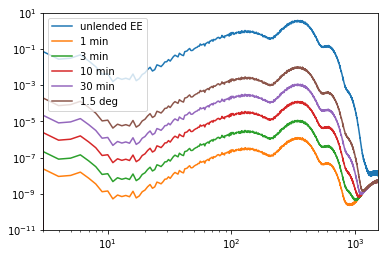

In [8]:
ls=np.arange(1,3*512+1)
sigma=30/60*np.pi/180  #smoothing


plt.plot(ls,unlensedTQU_TEB[1]*ls*(ls+1)/2/np.pi)
plt.plot(ls,unlensedTQU_alpha_TEB[0][2]*ls*(ls+1)/2/np.pi)
plt.plot(ls,unlensedTQU_alpha_TEB[1][2]*ls*(ls+1)/2/np.pi)
plt.plot(ls,unlensedTQU_alpha_TEB[2][2]*ls*(ls+1)/2/np.pi)
plt.plot(ls,unlensedTQU_alpha_TEB[12][2]*ls*(ls+1)/2/np.pi)
plt.plot(ls,unlensedTQU_alpha_TEB[14][2]*ls*(ls+1)/2/np.pi)


plt.plot(ls,unlensedTQU_TEB[2]*ls*(ls+1)/2/np.pi*np.exp(-ls*(ls+1)*sigma**2))
plt.yscale('log')
plt.xscale('log')
plt.legend(['unlended EE','1 min','3 min','10 min','30 min','1.5 deg'])
plt.xlim([3,1536])
plt.ylim([0.00000000001,10])
plt.show()



In [14]:
# #Filtering small spikes in the figure
# from scipy import signal
# unlensedTQU_E_filtered=np.exp(signal.medfilt(np.log(unlensedTQU_TEB[1]),kernel_size=31))
# unlensedTQU_alpha_1m_B_filtered=np.exp(signal.medfilt(np.log(unlensedTQU_alpha_1m_TEB[2]),kernel_size=31))
# unlensedTQU_alpha_3m_B_filtered=np.exp(signal.medfilt(np.log(unlensedTQU_alpha_3m_TEB[2]),kernel_size=31))
# unlensedTQU_alpha_10m_B_filtered=np.exp(signal.medfilt(np.log(unlensedTQU_alpha_10m_TEB[2]),kernel_size=31))
# unlensedTQU_alpha_30m_B_filtered=np.exp(signal.medfilt(np.log(unlensedTQU_alpha_30m_TEB[2]),kernel_size=31))
# unlensedTQU_alpha_90m_B_filtered=np.exp(signal.medfilt(np.log(unlensedTQU_alpha_90m_TEB[2]),kernel_size=31))

In [16]:
# cp1=camb.read_ini('planck_2018_acc_np_params.ini')  

# #compare with primordial B mode
# inflation_params = initialpower.InitialPowerLaw()
# inflation_params.set_params( r=0.01)
# results = camb.get_transfer_functions(cp1)
# results.power_spectra_from_transfer(inflation_params)
# cl56 = results.get_unlensed_total_cls(1500, CMB_unit='muK')

# inflation_params.set_params( r=0.001)
# results = camb.get_transfer_functions(cp1)
# results.power_spectra_from_transfer(inflation_params)
# cl01 = results.get_unlensed_total_cls(1500, CMB_unit='muK')

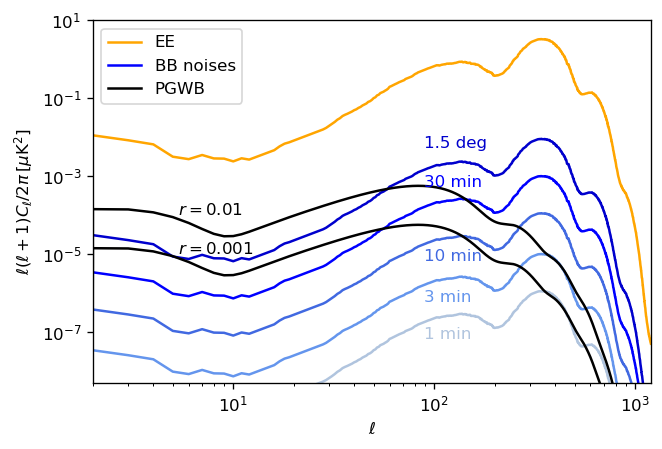

In [43]:
# ls=np.arange(1,3*512+1)
# fwhm=30/60*np.pi/180  #smoothing PGWB
# sigma=fwhm/2/np.sqrt(2*np.log(2))

# plt.figure(dpi=120)
# plt.plot(ls,unlensedTQU_E_filtered*ls*(ls+1)/2/np.pi,'orange',label='EE')
# plt.plot(ls,unlensedTQU_alpha_1m_B_filtered*ls*(ls+1)/2/np.pi,'lightsteelblue')
# plt.plot(ls,unlensedTQU_alpha_3m_B_filtered*ls*(ls+1)/2/np.pi,'cornflowerblue')
# plt.plot(ls,unlensedTQU_alpha_10m_B_filtered*ls*(ls+1)/2/np.pi,'royalblue')
# plt.plot(ls,unlensedTQU_alpha_30m_B_filtered*ls*(ls+1)/2/np.pi,'blue',label='BB noises')
# plt.plot(ls,unlensedTQU_alpha_90m_B_filtered*ls*(ls+1)/2/np.pi,'mediumblue')

# plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi\,[\mu {\rm K}^2]$')
# plt.xlabel(r'$\ell$')
# plt.plot(np.arange(1501),cl56[:,2]*np.exp(-np.arange(1501)*(np.arange(1501)+1)*sigma**2),'black',label='PGWB')
# plt.plot(np.arange(1501),cl01[:,2]*np.exp(-np.arange(1501)*(np.arange(1501)+1)*sigma**2),'black')

# plt.annotate(r'$r=0.01$',xy=(3,0.002),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='black')
# plt.annotate(r'$r=0.001$',xy=(3,0.0002),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='black')



# plt.annotate('1 min',xy=(50,0.0000013),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='lightsteelblue')
# plt.annotate('3 min',xy=(50,0.0000115),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='cornflowerblue')
# plt.annotate('10 min',xy=(50,0.00013),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='royalblue')
# plt.annotate('30 min',xy=(50,0.01),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='blue')
# plt.annotate('1.5 deg',xy=(50,0.1),xytext=(+30,-30),textcoords='offset points',fontsize=10,color='mediumblue')

# plt.yscale('log')
# plt.xscale('log')
# plt.legend(loc=0)
# #plt.title('B-mode Noise caused by polarization angle error with FWHM 30´',y=1.05)
# plt.xlim([2,1200])
# plt.ylim([0.000000005,10])
# plt.show()


In [10]:
%store unlensedTQU_TEB
%store unlensedTQU_alpha_TEB
%store unlensedTQU_DW_alpha_TEB
%store unlensedTQU_UD_alpha_TEB
%store unlensedTQU_SAT_alpha_TEB
%store unlensedTQU_PICO_alpha_TEB

Stored 'unlensedTQU_TEB' (ndarray)
Stored 'unlensedTQU_alpha_TEB' (ndarray)
Stored 'unlensedTQU_DW_alpha_TEB' (ndarray)
Stored 'unlensedTQU_UD_alpha_TEB' (ndarray)
Stored 'unlensedTQU_SAT_alpha_TEB' (ndarray)
Stored 'unlensedTQU_PICO_alpha_TEB' (ndarray)


In [13]:
unlensedTQU_alpha_TEB

array([[[ 2.7161495496854660e-13,  5.2631426541720830e-12,
          3.0481606449450067e+02, ...,  6.3267782431242965e-11,
          6.3920595419082978e-12,  6.3159702956106418e-11],
        [ 0.0000000000000000e+00,  0.0000000000000000e+00,
          1.5410648966244606e-02, ...,  1.5522907535157880e-14,
          3.5694858691897076e-14,  1.5353757186075249e-14],
        [ 0.0000000000000000e+00,  0.0000000000000000e+00,
          5.2159260691784387e-09, ...,  6.8395816460640583e-14,
          1.9345427075933088e-14,  6.8243504486144464e-14],
        [-0.0000000000000000e+00,  0.0000000000000000e+00,
          5.3652129221702283e-01, ..., -6.5411645820325435e-13,
          2.9327749034591116e-13, -6.5199457589012010e-13],
        [ 0.0000000000000000e+00,  0.0000000000000000e+00,
         -8.9655335343892860e-06, ..., -1.3086813327208891e-14,
          1.9739367850277498e-15, -1.3057031492400027e-14],
        [-0.0000000000000000e+00,  0.0000000000000000e+00,
         -3.12212488283086